In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
IMAGE_SHAPE = (224, 224)
classifier = tf.keras.Sequential([
                                  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",)
])

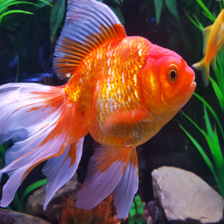

In [ ]:
gold_fish = Image.open('goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [ ]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [ ]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [ ]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [ ]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [ ]:
with open("ImageNetLabels.txt", "r") as f:
  image_labels = f.read().splitlines()
image_labels[:5]

['\ufeffbackground', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [ ]:
image_labels[predicted_label_index]

'goldfish'

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir=".", untar=True)
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob("*/*.jpg"))[:5]

[PosixPath('datasets/flower_photos/tulips/14861513337_4ef0bfa40d.jpg'),
 PosixPath('datasets/flower_photos/tulips/4520577328_a94c11e806_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/8454719295_4276c0e9c5_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/14067778605_0285b7cc3a.jpg'),
 PosixPath('datasets/flower_photos/tulips/16702188449_3dacce90b2_m.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob("roses/*"))
roses[:5]

[PosixPath('datasets/flower_photos/roses/14145188939_b4de638bd3_n.jpg'),
 PosixPath('datasets/flower_photos/roses/19271410704_932d1f2c97_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3074406590_91c697c805_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15277801151_5ed88f40f0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14414117598_cf70df30de.jpg')]

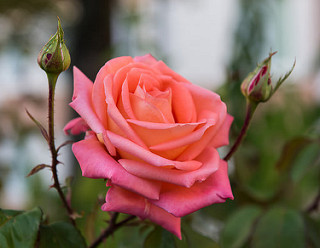

In [ ]:
Image.open(str(roses[3]))

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:5]

[PosixPath('datasets/flower_photos/tulips/14861513337_4ef0bfa40d.jpg'),
 PosixPath('datasets/flower_photos/tulips/4520577328_a94c11e806_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/8454719295_4276c0e9c5_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/14067778605_0285b7cc3a.jpg'),
 PosixPath('datasets/flower_photos/tulips/16702188449_3dacce90b2_m.jpg')]

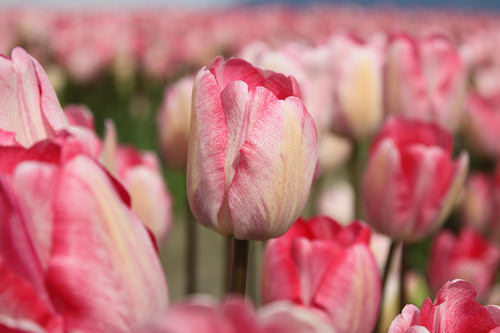

In [ ]:
Image.open(str(tulips[0]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [ ]:
flowers_images_dict['tulips']

[PosixPath('datasets/flower_photos/tulips/14861513337_4ef0bfa40d.jpg'),
 PosixPath('datasets/flower_photos/tulips/4520577328_a94c11e806_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/8454719295_4276c0e9c5_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/14067778605_0285b7cc3a.jpg'),
 PosixPath('datasets/flower_photos/tulips/16702188449_3dacce90b2_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/13910678178_25e8b1a5e5.jpg'),
 PosixPath('datasets/flower_photos/tulips/16283125269_4cfae953f1.jpg'),
 PosixPath('datasets/flower_photos/tulips/8603340662_0779bd87fd.jpg'),
 PosixPath('datasets/flower_photos/tulips/8713390684_041148dd3e_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/4644110077_ff252cd7c4.jpg'),
 PosixPath('datasets/flower_photos/tulips/16645809126_613b1e3ebe_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/14487943607_651e8062a1_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/2351637471_5dd34fd3ac_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/14122029097_3e

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/14145188939_b4de638bd3_n.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(220, 320, 3)

In [ ]:
cv2.resize(img, IMAGE_SHAPE).shape

(224, 224, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, IMAGE_SHAPE)
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
gold_fish = np.array(gold_fish)/255
gold_fish.shape

(224, 224, 3)

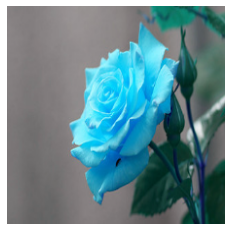

In [ ]:
plt.axis('off')
plt.imshow(X[0])

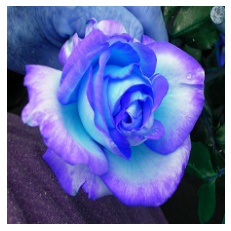

In [ ]:
plt.axis('off')
plt.imshow(X[1])

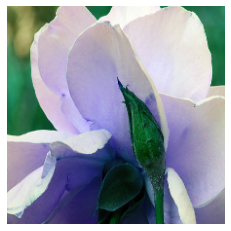

In [ ]:
plt.axis('off')
plt.imshow(X[10])

In [ ]:
predicted = classifier.predict(np.array([X[0], X[1], X[10]]))
predicted = np.argmax(predicted, axis=1)
predicted

array([795, 795, 795])

In [ ]:
image_labels[795]

'shower curtain'

## Retraining the model

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224,224,3), trainable=False
)

In [ ]:
num_of_flowers = 5

model = tf.keras.Sequential([
                             pretrained_model_without_top_layer,
                             tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
92/92 [==============================] - 12s 85ms/step - loss: 0.8250 - accuracy: 0.6931
Epoch 2/5
92/92 [==============================] - 7s 81ms/step - loss: 0.4098 - accuracy: 0.8593
Epoch 3/5
92/92 [==============================] - 7s 81ms/step - loss: 0.3166 - accuracy: 0.8920
Epoch 4/5
92/92 [==============================] - 7s 80ms/step - loss: 0.2643 - accuracy: 0.9169
Epoch 5/5
92/92 [==============================] - 7s 81ms/step - loss: 0.2276 - accuracy: 0.9295


In [ ]:
model.evaluate(X_test_scaled, y_test)

23/23 [==============================] - 3s 105ms/step - loss: 0.3775 - accuracy: 0.8692


[0.3774723410606384, 0.8692098259925842]